<div style="text-align: right;">
<h4> <b>Author:</b> <a style="color:blue;">Sujith Kumar</a> </h4>
<h4> <b>Subject:</b> <a style="color:blue;">Lending Club Case Study</a> </h4>
<h4> <b>Batch:</b> <a style="color:blue;">April 2022</a> </h4>
</div>    

#### Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import pandas as pd

#### Read the data file

In [2]:
loan_df = pd.read_csv("loan.csv")

C:\Users\sujit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print("Initial Shape of data set {}".format(loan_df.shape))

Initial Shape of data set (39717, 111)


#### Check the number of columns where data is null

In [4]:
#
# All the attributes whose sum of number of rows with null value equal to total rows of the data set
# implies that the attribute is completely null for all the rows
#
x_na_fields =loan_df.isna().sum()
x_na_fields=x_na_fields[x_na_fields==loan_df.shape[0]]
print(x_na_fields.index)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

#### Drop all the columns where data is null

In [5]:
loan_df=loan_df.drop(x_na_fields.index,axis=1)

In [6]:
loan_df.shape

(39717, 57)

#### Below columns are behavioral attributes that do not help drive approvals or rejections on a new loan for different set of customers

In [7]:
x_beh_fields=['delinq_2yrs','earliest_cr_line','inq_last_6mths','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
              'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
              'last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','pub_rec','revol_bal']

#### Drop the behavioral columns

In [8]:
loan_df=loan_df.drop(x_beh_fields,axis=1)

In [9]:
loan_df.shape

(39717, 39)

#### Identify columns where most of the values are null and hence wont aid in analysis

In [10]:
#
#Loop through all columns in dataframe and identify how many unique values
#
x_dist_attrs =[]
x_non_uniq_heavy=[]
x_na_heavy=[]
for col in loan_df.columns:
    #
    # Identify all unique value attributes, below condition will be true if only one unique value and rest null
    #
    if (len(loan_df[col].value_counts())==1):
        x_dist_attrs.append(col)
    #
    # Identify all unique value attributes, below condition will be true if every value is unique
    #    
    elif (len(loan_df[col].value_counts())==loan_df.shape[0]):
        x_dist_attrs.append(col)
    #
    # Identify non integer attributes with high percent of non unique values
    #
    elif ((len(loan_df[col].value_counts())/loan_df.shape[0] > 0.5) & (loan_df[col].dtype!=np.int64)):
        x_non_uniq_heavy.append(col)
    #
    # Identify attributes with high percent of na values
    #
    elif ((loan_df[col].isna().sum())/loan_df.shape[0] > 0.5):
        x_na_heavy.append(col)
    
    
print("Attributes where all values are unique: ", x_dist_attrs)        
print("\nAttributes where more than 50% values are unique: ", x_non_uniq_heavy)   
print("\nAttributes where more than 50% values are null: ", x_na_heavy)   

Attributes where all values are unique:  ['id', 'member_id', 'pymnt_plan', 'url', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

Attributes where more than 50% values are unique:  ['emp_title', 'desc']

Attributes where more than 50% values are null:  ['mths_since_last_delinq', 'mths_since_last_record']


In [11]:
#
# Print and observe the unique value attributes identified above to ascertain removal
#
for attr in x_dist_attrs:
    print( loan_df[attr].value_counts())    

1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64
1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64
n    39717
Name: pymnt_plan, dtype: int64
https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/brows

In [12]:
#
# Analyze the mths related attributes
#
print(loan_df['mths_since_last_delinq'].value_counts())
print('--------')
print('mths_since_last_delinq null percent= ',loan_df['mths_since_last_delinq'].isna().sum()/loan_df.shape[0])
print('--------')
print(loan_df['mths_since_last_record'].value_counts())
print('--------')
print('mths_since_last_record null percent= ',loan_df['mths_since_last_record'].isna().sum()/loan_df.shape[0])
print('--------')

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64
--------
mths_since_last_delinq null percent=  0.6466248709620566
--------
0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
19.0       1
20.0       1
120.0      1
129.0      1
5.0        1
Name: mths_since_last_record, Length: 111, dtype: int64
--------
mths_since_last_record null percent=  0.9298537150338646
--------


In [13]:
#
# after analyzing above attributes, these are observed as not helpful for analysis
# Ex: desc column has data which is not structured
# mths_since_last_delinq is for ongoing loan and hence can't be helpful with the objective
# mths_since_last_record over 90% is null and hence can't help with any analysis
#
loan_df=loan_df.drop(x_dist_attrs,axis=1)
loan_df=loan_df.drop(x_non_uniq_heavy,axis=1)
loan_df= loan_df.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1)

#### List the columns now in dataset and analyze each one to determine if it has to be kept for analysis

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

#### Start analysis for loan amount. Three columns are observed

In [15]:
#
# Check if there is any wrong data rows, funded amount greater than applied loan amount is a wrong row which could be dropped
#
print('Number of rows where funded_amnt > loan_amnt =',loan_df[loan_df.funded_amnt>loan_df.loan_amnt].shape[0])
print('Number of rows where funded_amnt_inv > loan_amnt =',loan_df[loan_df.funded_amnt_inv>loan_df.loan_amnt].shape[0])

Number of rows where funded_amnt > loan_amnt = 0
Number of rows where funded_amnt_inv > loan_amnt = 0


                 loan_amnt  funded_amnt  funded_amnt_inv
loan_amnt         1.000000     0.981578         0.940034
funded_amnt       0.981578     1.000000         0.958422
funded_amnt_inv   0.940034     0.958422         1.000000


<AxesSubplot:>

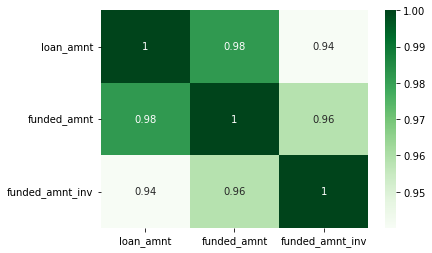

In [16]:
#
# Get correlation between the amount columns
#
print(loan_df[['loan_amnt','funded_amnt','funded_amnt_inv']].corr())
sns.heatmap(loan_df[['loan_amnt','funded_amnt','funded_amnt_inv']].corr(),annot=True,cmap='Greens')

In [17]:
#
# Since the three amount columns show high correlation, only one loan_amount is retained for analysis
#
loan_df= loan_df.drop(['funded_amnt','funded_amnt_inv'],axis=1)

In [18]:
#
# Check categorical values for purpose and title
#
print(loan_df.purpose.value_counts())
print('\n----------------\n')
print(loan_df.title.value_counts())

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

----------------

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64


In [19]:
#
# Title has huge number of non unique values and would not help with categorization
#
loan_df= loan_df.drop(['title'],axis=1)

In [20]:
#
# Check for zip code and state
#
print(loan_df.zip_code.value_counts())
print('\n----------------\n')
print(loan_df.addr_state.value_counts())

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

----------------

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64


In [21]:
#
# zip can be observed as masked values and hence can be removed
# state needs further analysis
#
loan_df= loan_df.drop(['zip_code'],axis=1)

In [22]:
#
#Analyze attribute pub_rec_bankruptcies
#
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
#
# most of the rows for attr pub_rec_bankruptcies have value 0, column can be dropped
#
loan_df= loan_df.drop(['pub_rec_bankruptcies'],axis=1)

In [24]:
#
# Print the final list of columns that will be used for analysis
#
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   installment          39717 non-null  float64
 4   grade                39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   emp_length           38642 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   annual_inc           39717 non-null  float64
 9   verification_status  39717 non-null  object 
 10  issue_d              39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  addr_state           39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  open_acc             39717 non-null 

### Perform cleanup on rows

In [25]:
#
# Interest Rate and Revol_Util are seen as object types due to %char
#
print('Null rows for interest Rate, Revol_util is {0} and {1} respectively'.format(loan_df.int_rate.isna().sum(),loan_df.revol_util.isna().sum()))

Null rows for interest Rate, Revol_util is 0 and 50 respectively


In [26]:
#
# Remove rows where revol_util is null 
#
loan_df = loan_df[loan_df.revol_util.notna()]
#
# Change the data type of interest rate and revol util by removing %
#
loan_df.int_rate=loan_df.int_rate.apply(lambda x: x.replace('%','')).astype(np.float64)
loan_df.revol_util=loan_df.revol_util.apply(lambda x: x.replace('%','')).astype(np.float64)

In [27]:
#
# Perform a describe to do a quick check on outliers
#
loan_df.describe()

loan_amnt      int_rate   installment    annual_inc           dti  \
count  39667.000000  39667.000000  39667.000000  3.966700e+04  39667.000000   
mean   11227.664053     12.016587    324.770793  6.899952e+04     13.318704   
std     7456.610740      3.723856    208.882852  6.378947e+04      6.676975   
min      500.000000      5.420000     15.690000  4.000000e+03      0.000000   
25%     5500.000000      9.250000    167.080000  4.051632e+04      8.180000   
50%    10000.000000     11.830000    280.610000  5.900000e+04     13.410000   
75%    15000.000000     14.540000    430.780000  8.240000e+04     18.600000   
max    35000.000000     24.590000   1305.190000  6.000000e+06     29.990000   

           open_acc    revol_util     total_acc  
count  39667.000000  39667.000000  39667.000000  
mean       9.300250     48.832152     22.103411  
std        4.398866     28.332634     11.398386  
min        2.000000      0.000000      2.000000  
25%        6.000000     25.400000     14.000000  
50%        9.000000     49.300000     20.000000  
75%       12.000000     72.400000     29.000000  
max       44.000000     99.900000     90.000000

### Define functions to format and plot outliers

In [28]:
#
# Generic Format function for numbers in M or K format
#
def num_format(x,y):
    if (x==0):
        return 0
    elif (x<1000000):
        return '%1.0fK' % (x * 1e-3)
    elif (x>=1000000):
        return '%1.0fM' % (x * 1e-6)

In [29]:
#
# define function to evaluate outliers
#
def eval_outliers_fun():
        x = loan_df[loan_df["loan_amnt"]>= loan_df["loan_amnt"].quantile(0.995)]
        print('{0} rows in dataset which fall above 99.5 percentile of the loan_amnt ie., {1} percent of rows'.format(x.shape[0],round(100*x.shape[0]/loan_df.shape[0],2)))
        x = loan_df[loan_df["annual_inc"]>= loan_df["annual_inc"].quantile(0.99)]
        print('{0} rows in dataset which fall above 99 percentile of the annual_inc ie., {1} percent of rows'.format(x.shape[0],round(100*x.shape[0]/loan_df.shape[0],2)))
        x = loan_df[loan_df["open_acc"]>= loan_df["open_acc"].quantile(0.995)]
        print('{0} rows in dataset which fall above 99.5 percentile of the open_acc ie., {1} percent of rows'.format(x.shape[0],round(100*x.shape[0]/loan_df.shape[0],2)))
        x = loan_df[loan_df["total_acc"]>= loan_df["total_acc"].quantile(0.995)]
        print('{0} rows in dataset which fall above 99.5 percentile of the total_acc ie., {1} percent of rows'.format(x.shape[0],round(100*x.shape[0]/loan_df.shape[0],2)))
        outlier_cols =["loan_amnt","annual_inc","open_acc","total_acc"]
        fig, axes = plt.subplots(1,len(outlier_cols))
        for col, ax in enumerate(axes.flat):
            ax.boxplot(loan_df[outlier_cols[col]])
            ax.set_title(outlier_cols[col], fontsize=10)
            ax.tick_params(axis='y', labelsize=14)
            if (outlier_cols[col]=='annual_inc'):
                    ax.yaxis.set_major_formatter(tick.FuncFormatter(num_format))
        plt.tight_layout()

### Remove current loan from analysis as it won't help with the objective

In [30]:
#
# Remove ongoing loans from further analysis
#
loan_df = loan_df[loan_df["loan_status"]!='Current']

### Check the spread before removing outliers

601 rows in dataset which fall above 99.5 percentile of the loan_amnt ie., 1.56 percent of rows
389 rows in dataset which fall above 99 percentile of the annual_inc ie., 1.01 percent of rows
265 rows in dataset which fall above 99.5 percentile of the open_acc ie., 0.69 percent of rows
206 rows in dataset which fall above 99.5 percentile of the total_acc ie., 0.53 percent of rows


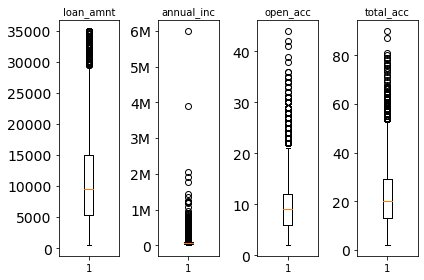

In [31]:
#------ Spread before removing outliers ---------
eval_outliers_fun()

In [32]:
#
# Remove outliers of annual_inc
#
loan_df = loan_df[loan_df["annual_inc"]< loan_df["annual_inc"].quantile(0.99)]
#
# Remove outliers of total_acc
#
loan_df = loan_df[loan_df["total_acc"]< loan_df["total_acc"].quantile(0.99)]

531 rows in dataset which fall above 99.5 percentile of the loan_amnt ie., 1.41 percent of rows
380 rows in dataset which fall above 99 percentile of the annual_inc ie., 1.01 percent of rows
258 rows in dataset which fall above 99.5 percentile of the open_acc ie., 0.68 percent of rows
233 rows in dataset which fall above 99.5 percentile of the total_acc ie., 0.62 percent of rows


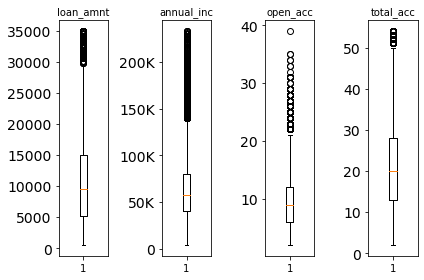

In [33]:
#------ Spread after removing outliers ---------
eval_outliers_fun()

In [34]:
loan_df.shape

(37709, 18)

#### Plot Loan percentage - Fully Paid vs Charged Off

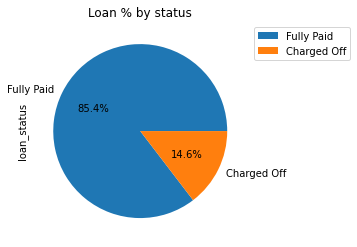

In [35]:
loan_df.loan_status.value_counts().plot(kind="pie",autopct='%1.1f%%',title="Loan % by status",legend=True)
plt.annotate
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Define functions to plot and annotate bars for reuse

In [36]:
#
# Define function to plot bars
# -------------------------------
# data : input data frame
# x : attribute on x axes
# y : attribute on y axes
# xstretch : to resize figure for x axes if categories are large in number
# bar_annot : In case bars need not be annotated based on the function defined later
# val_format : sometime bar need to show integer, sometimes percent
# title : If title needs to be printed
# order : If the x axis needs to be ordered
# x_rotate : Few categories of bins are long values, hence need to rotate
# -------------------------------
#
def bar_plot_func(data,x,y,xstretch=False,bar_annot=False,val_format='int',title='None',order=None,x_rotate=False):
    if (xstretch):
        plt.figure(figsize=(15,5))
    snsbars = sns.barplot(data=data,x=x,y=y,order=order)
    if bar_annot:
       bar_annot_fun(plt,bars=snsbars,val_format=val_format,title=title)
    if x_rotate:
       snsbars.set_xticklabels(snsbars.get_xticklabels(),rotation=90,fontsize=8)    
    plt.show()
    plt.clf()
    plt.close()

In [37]:
#
# Define function for count plot
# -------------------------------
# data : input data frame
# x : attribute on x axes
# hue : hue attribute
# xstretch : to resize figure for x axes if categories are large in number
# bar_annot : In case bars need not be annotated based on the function defined later
# val_format : sometime bar need to show integer, sometimes percent
# title : If title needs to be printed
# order : If the x axis needs to be ordered
# x_rotate : Few categories of bins are long values, hence need to rotate
# -------------------------------
#
def count_plot_func(data,x,hue,xstretch=False,bar_annot=False,val_format='int',title='None',order=None,x_rotate=False):
    if (xstretch):
        plt.figure(figsize=(15,5))
    snsbars = sns.countplot(data=data,x=x,hue=hue,order=order)
    if bar_annot:
       bar_annot_fun(plt,bars=snsbars,val_format=val_format,title=title)
    if x_rotate:
       snsbars.set_xticklabels(snsbars.get_xticklabels(),rotation=90,fontsize=8)    
    plt.show()
    plt.clf()
    plt.close()

In [38]:
#
# Define a function to annotate bar plots
# -------------------------------
# plt : Is the plot being plotted
# bars : once a hist or bar is plotted, pass the reference here
# val_format : sometime bar need to show integer, sometimes percent
# title : If title needs to be printed
# -------------------------------
#
def bar_annot_fun(plt,bars,val_format,title):
    sns.despine(bottom = False, left = False)
    for bar in bars.patches:
            if val_format=='int':
                val=format(int(bar.get_height()), ',')
            elif val_format=='%':
                val=format(bar.get_height(), '.2%')                
            elif val_format=='f%':
                val=format(bar.get_height(), '.2f')                
                val=val+'%'
            elif val_format=='f':
                val=format(bar.get_height(), '.2f')
            plt.annotate(val,
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=8    )
            plt.title(title+'\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'cornflowerblue'})

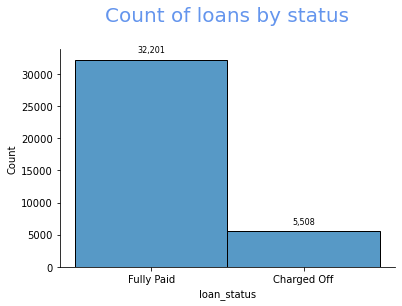

In [39]:
#
# Plot the number of loans by status
#
histplt = sns.histplot(data=loan_df,x ='loan_status')
bar_annot_fun(plt,bars=histplt,val_format='int',title="Count of loans by status")

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Majority (over 85%) of loans are fully paid </h3>

### Retrieve Month and Year when Loan was issued for analysis

In [40]:
#
#Retrieve Month and Year when Loan was issued for analysis
#
from datetime import datetime
loan_df['issue_m'] =loan_df['issue_d'].apply(lambda x : datetime.strftime(datetime.strptime(x, '%b-%y'), '%m'))
loan_df['issue_y'] =loan_df['issue_d'].apply(lambda x : datetime.strftime(datetime.strptime(x, '%b-%y'), '%Y'))

### Create Buckets to create categorical data

In [41]:
#
# Buckets for loan amount
#
loan_amnt_bin =  np.arange(0, loan_df.loan_amnt.max()+5000, 5000)
loan_df['loan_amnt_bin'] =pd.cut(loan_df.loan_amnt,loan_amnt_bin)
#
# Buckets for Interest Rate
#
int_rate_bin =  np.arange(0, loan_df.int_rate.max()+3, 3)
loan_df['int_rate_bin'] =pd.cut(loan_df.int_rate,int_rate_bin)
#
# Buckets for Installment
#
installment_bin =  np.arange(0, loan_df.installment.max()+300, 300) 
loan_df['installment_bin'] =pd.cut(loan_df.installment,installment_bin)
#
# Buckets for Annual Income
#
annual_inc_bin = np.arange(0, loan_df.annual_inc.max()+50000, 50000)
loan_df['annual_inc_bin'] =pd.cut(loan_df.annual_inc,annual_inc_bin)
#
# Buckets for Debt to Income
#
dti_bin = np.arange(0, loan_df.dti.max()+5, 5)
loan_df['dti_bin'] =pd.cut(loan_df.dti,dti_bin,include_lowest=True)
#
# Buckets for Revolving Util
#
revol_util_bin = np.arange(0, loan_df.revol_util.max()+10, 10)
loan_df['revol_util_bin'] =pd.cut(loan_df.revol_util,revol_util_bin,include_lowest=True)
#
# Create dictionary map for experience using which buckets for emp_length can be generated
#
exp_dic={'< 1 year':'1.(<1 year)','1 year'  :'2.(1-3yr)','2 years' :'2.(1-3yr)','3 years' :'2.(1-3yr)',
         '4 years' :'3.(4-6yr)','5 years' :'3.(4-6yr)', '6 years' :'3.(4-6yr)',
         '7 years' :'4.(7-9yr)','8 years' :'4.(7-9yr)','9 years' :'4.(7-9yr)','10+ years':'5.(10+yrs)',
         'n/a':'6.NotAvailable',np.nan:'6.NotAvailable'}
loan_df['emp_experience'] =loan_df['emp_length']
loan_df.replace({"emp_experience":exp_dic},inplace=True)

In [42]:
#
# Post binning check if any Null Values
#
print(loan_df.loan_amnt_bin.isna().sum(),loan_df.int_rate_bin.isna().sum(),loan_df.installment_bin.isna().sum(),
      loan_df.emp_experience.isna().sum(),loan_df.annual_inc_bin.isna().sum(),loan_df.dti_bin.isna().sum(),
      loan_df.revol_util_bin.isna().sum())


0 0 0 0 0 0 0


In [43]:
#
# Store paid loans and default loans into separate data sets for easy analysis
#
paid_df =loan_df[loan_df.loan_status=='Fully Paid']
default_df =loan_df[loan_df.loan_status=='Charged Off']
print('Paid Shape',paid_df.shape,' Default Shape', default_df.shape)

Paid Shape (32201, 27)  Default Shape (5508, 27)


### Create a function to get counts of Paid and Default for any attribute and return defaults ot paid ratio

In [44]:
#
# Define function to get counts of Paid and ChargedOff for any attribute
#
def get_cnts_paid_def_func (attr):
    def_attr_cnt=default_df[attr].value_counts()
    def_attr_cnt_df = pd.DataFrame({attr:def_attr_cnt.index,"defaults":def_attr_cnt.values})
    paid_attr_cnt = paid_df[attr].value_counts()
    paid_attr_cnt_df = pd.DataFrame({attr:paid_attr_cnt.index,"paid":paid_attr_cnt.values})
    attr_df = pd.merge(paid_attr_cnt_df,def_attr_cnt_df,on=attr,how='inner')
    attr_df['defaults_to_paid'] = attr_df.defaults/(attr_df.paid+attr_df.defaults)
    return def_attr_cnt_df,paid_attr_cnt_df,attr_df

### Univariate Analysis

In [45]:
#
# Define function to plot counts of loan for the attribute
# Plot the Default percentage when compared to Total to evaluate the attribute impact on defaulting
#

def univ_attr_plot (attr):
    x_stretch=False
    if (attr in('sub_grade','addr_state','purpose','issue_m')):
        x_stretch=True
    def_cnt,paid_cnt,percent_stat = get_cnts_paid_def_func(attr)
    order=def_cnt.sort_values(attr)[attr]
    x_rotate = True if attr in ['purpose','home_ownership'] else False
    count_plot_func(data= loan_df, x=attr,hue='loan_status',xstretch=x_stretch,bar_annot=True,val_format='int',title='Counts by {0}'.format(attr),order=order,x_rotate=x_rotate)
    bar_plot_func(data=percent_stat,x=attr,y='defaults_to_paid',xstretch=x_stretch,bar_annot=True,val_format='%',title='By {0} : Default Percent to Total'.format(attr),order=order,x_rotate=x_rotate)


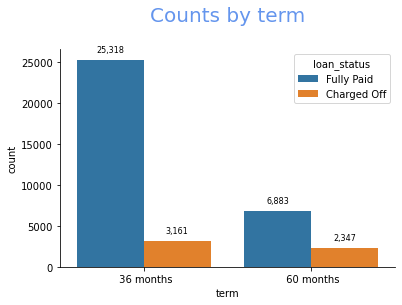

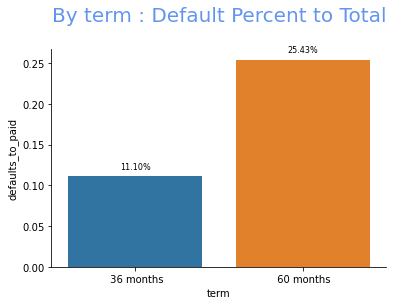

In [46]:
#
# Univariate analysis for term
#
univ_attr_plot('term')

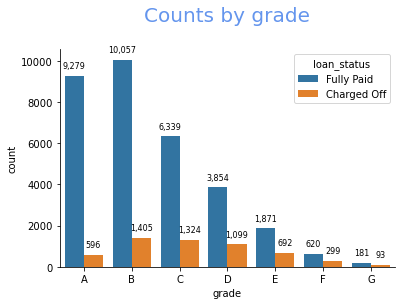

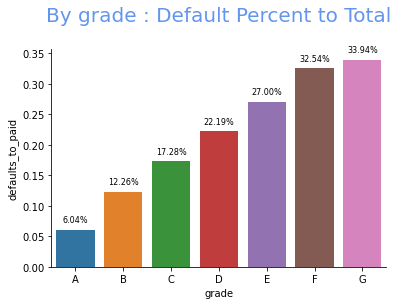

In [47]:
#
# Univariate analysis for grade
#
univ_attr_plot('grade')

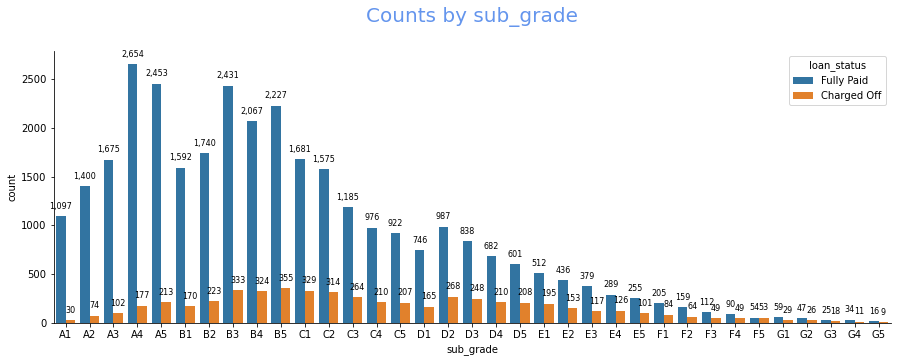

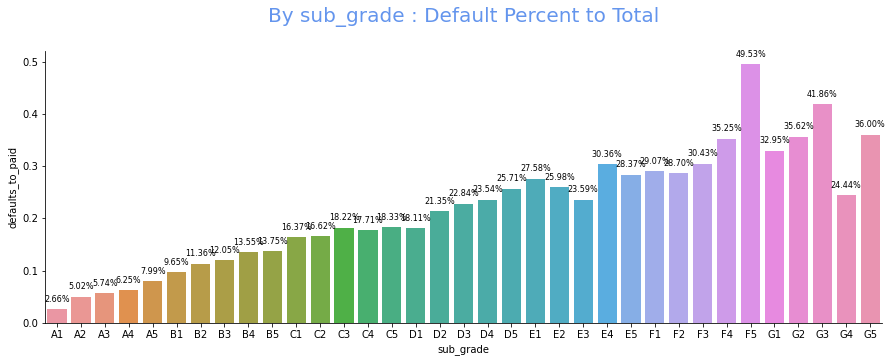

In [48]:
#
# Univariate analysis for sub grade
#
univ_attr_plot('sub_grade')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Defaulting risk is high for loans with Subgrade as E1-G5 </h3>

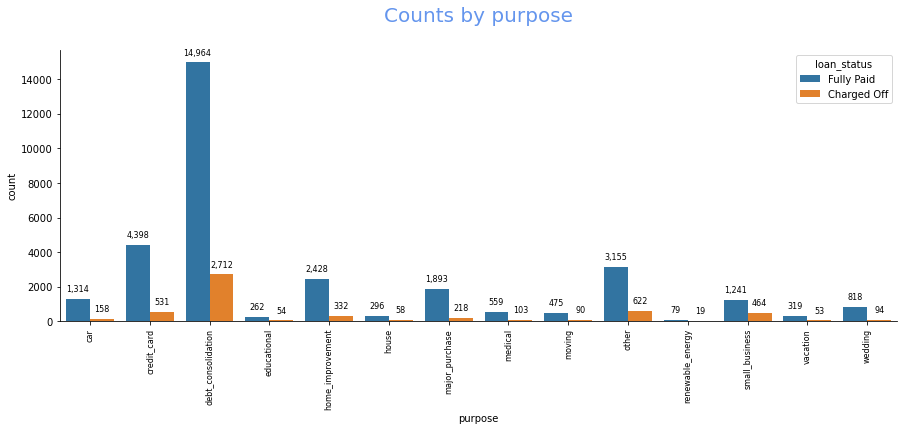

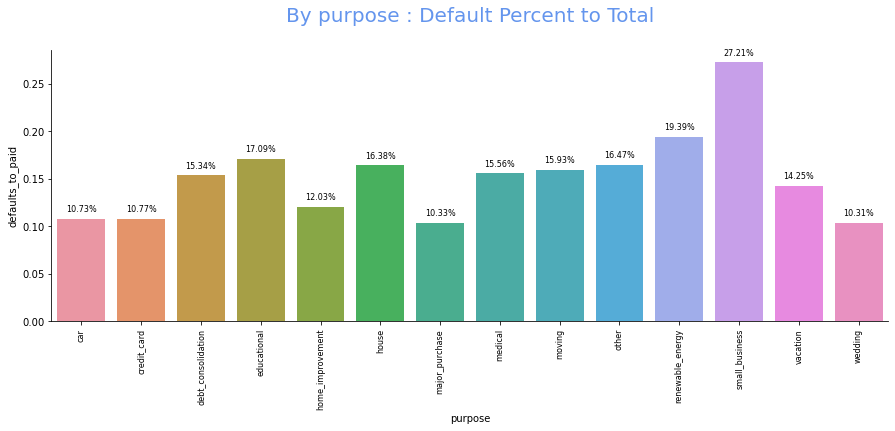

In [49]:
#
# Univariate analysis for purpose
#
univ_attr_plot('purpose')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Maximum loan is taken for ‘debt consolidation’. While 15% of loans taken for the purpose default, it is also a good business opportunity
 </h3>

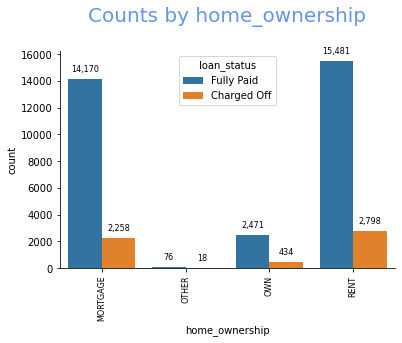

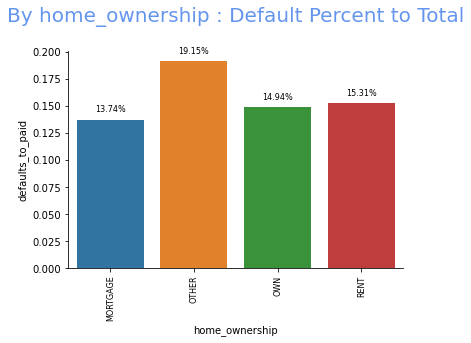

In [50]:
#
# Univariate analysis for home_ownership
#
univ_attr_plot('home_ownership')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Home Ownership by itself does not show a significant impact on defaulting </h3>

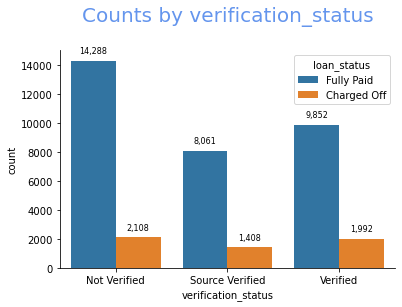

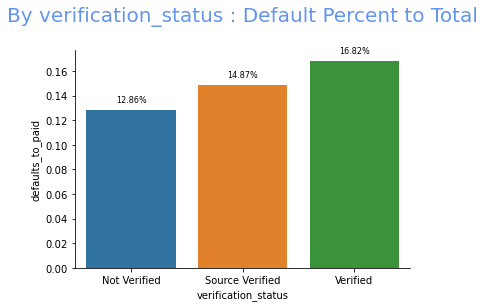

In [51]:
#
# Univariate analysis for verification_status
#
univ_attr_plot('verification_status')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Maximum loans are disbursed without income verification, but their default % is less compared to income verified loans </h3>

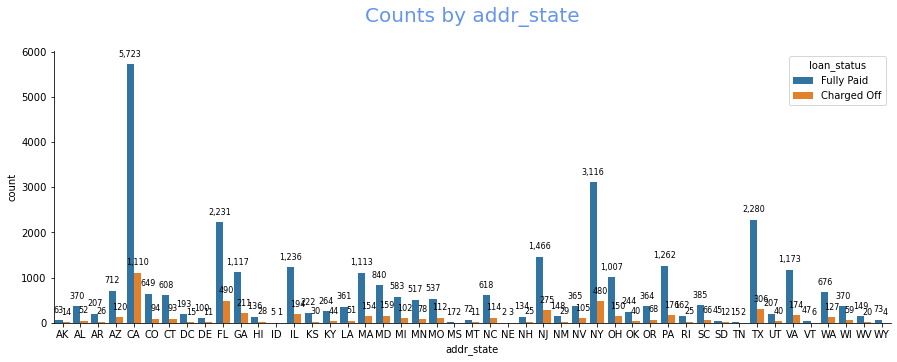

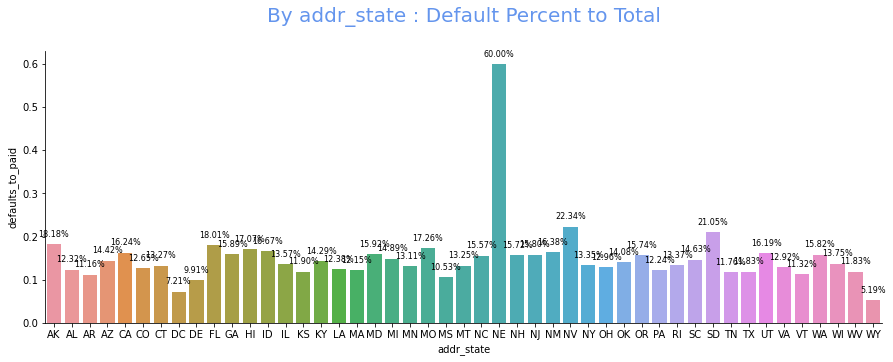

In [52]:
#
# Univariate analysis for addr_state
#
univ_attr_plot('addr_state')

In [53]:
#
# Check the anomaly for NE state
#
pd.pivot_table(data=loan_df[loan_df.addr_state=='NE'],index='loan_status',aggfunc='size')

loan_status
Charged Off    3
Fully Paid     2
dtype: int64

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Most of the states show similar percentage distribution for defaults </h3>

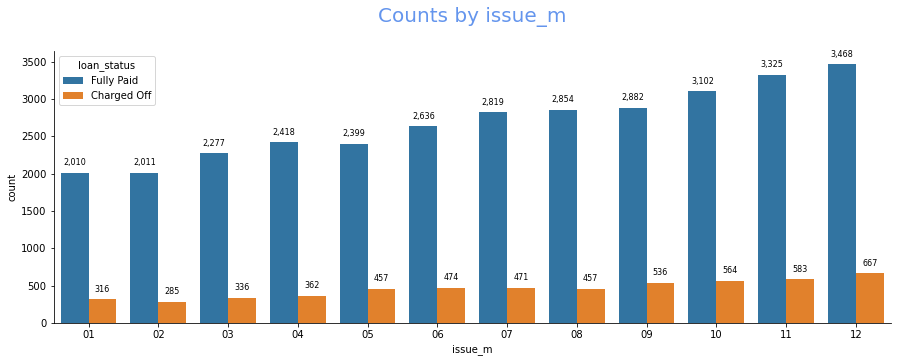

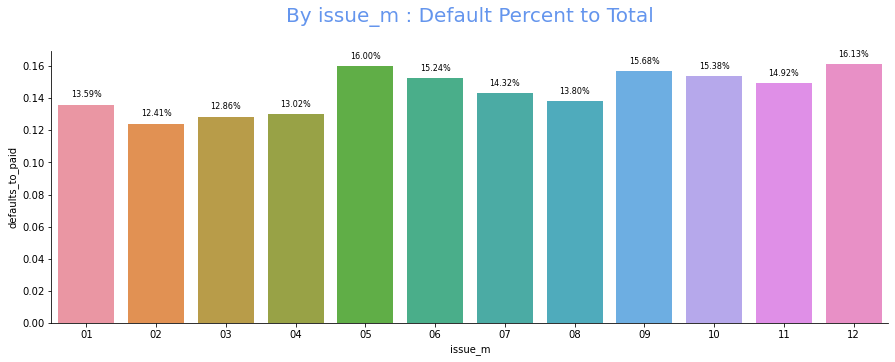

In [54]:
#
# Univariate analysis for Issued Month
#
univ_attr_plot('issue_m')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Maximum loans are availed towards the end of the year, higher defaults during May,Dec </h3>

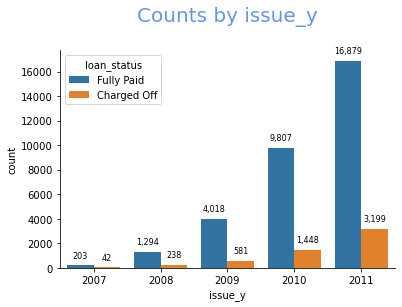

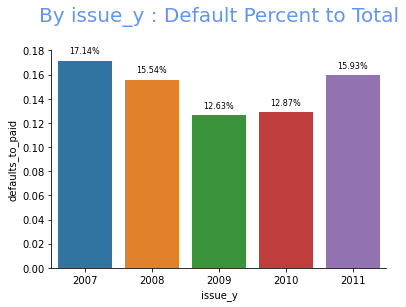

In [55]:
#
# Univariate analysis for Issued Year
#
univ_attr_plot('issue_y')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Loans disbursed by year has increased showing growth in business </h3>

### Univariate Analysis for binned attributes

In [56]:
#
# Define function to plot counts of loan for the binned attribute
# Plot the Default percentage when compared to Total to evaluate the binned attribute impact on defaulting
#
def univ_bin_attr_plot(attr):
    def_cnt,paid_cnt,percent_stat = get_cnts_paid_def_func(attr)
    order=def_cnt.sort_values(attr)[attr]
    count_plot_func(data= loan_df, x=attr,hue='loan_status',xstretch=True,bar_annot=True,val_format='f',title='Counts by {0}'.format(attr),order=order,x_rotate=True)
    bar_plot_func(data=percent_stat,x=attr,y='defaults_to_paid',xstretch=True,bar_annot=True,val_format='%',title='By {0} : Default Percent to Total'.format(attr),order=order,x_rotate=True)


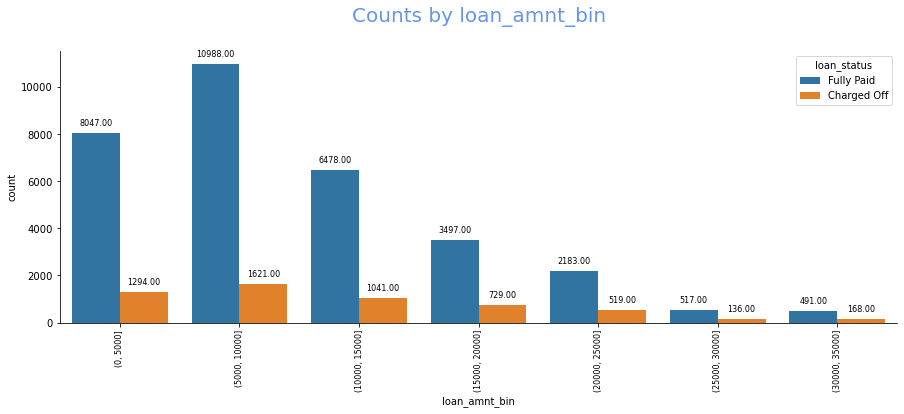

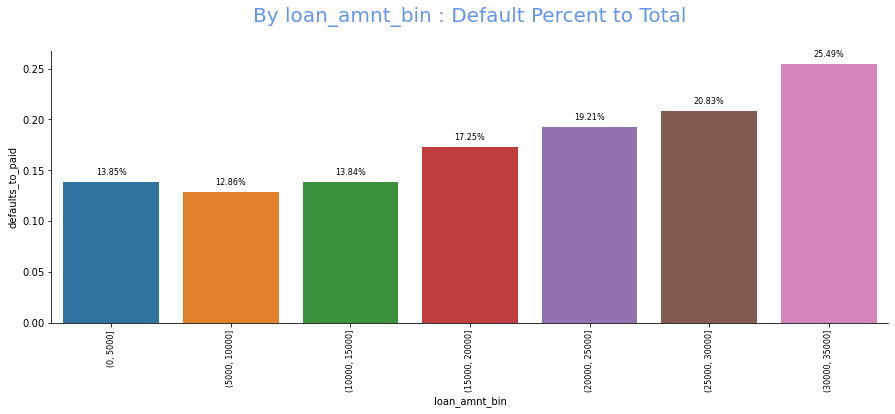

In [57]:
#
# Univariate analysis for loan_amnt_bin
#
univ_bin_attr_plot('loan_amnt_bin')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Maximum loans availed are of low to mid value,Percentage of defaults is higher as the loan amount increases </h3>

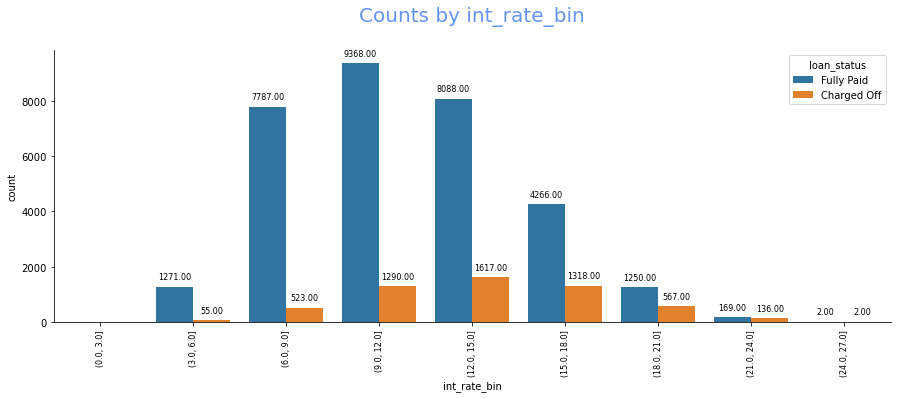

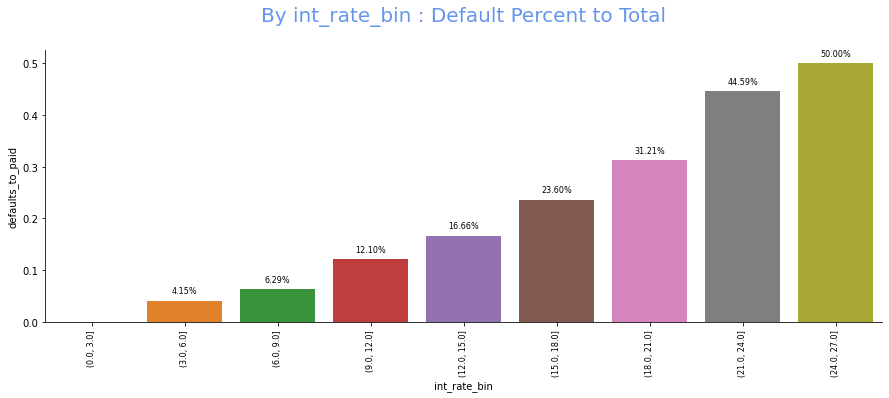

In [58]:
#
# Univariate analysis for int_rate_bin
#
univ_bin_attr_plot('int_rate_bin')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Low interest rate is driving higher number of loans with lower percent of defaults </h3>

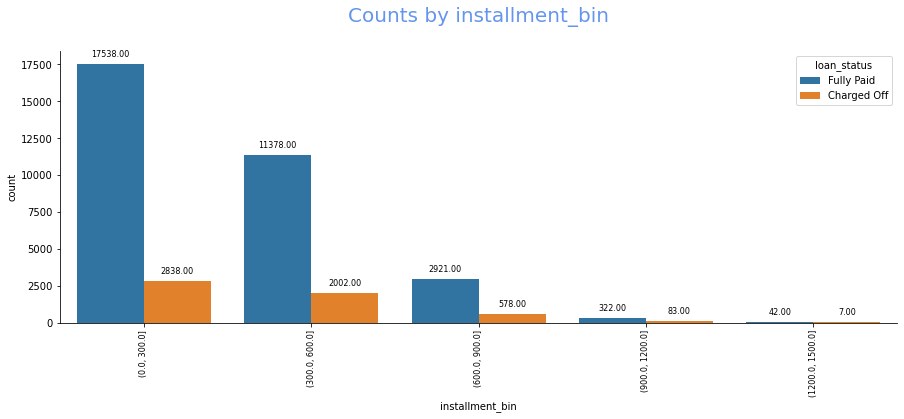

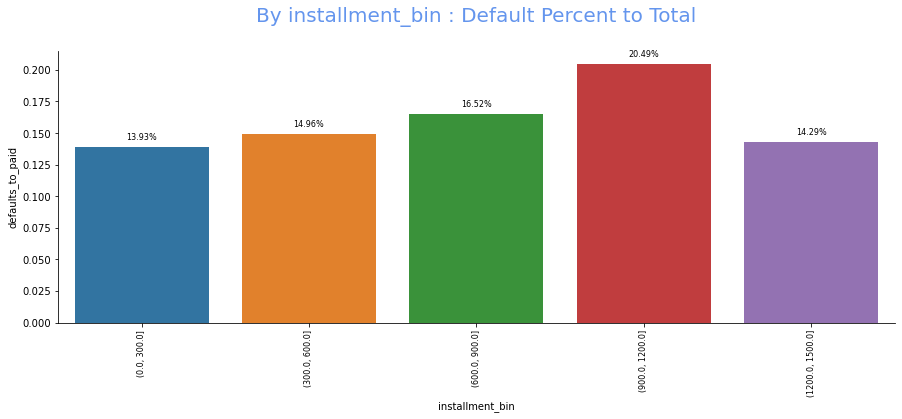

In [59]:
#
# Univariate analysis for installment_bin
#
univ_bin_attr_plot('installment_bin')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Loans with Instalment below 300$ is most beneficial to business with higher loan disbursement and relatively lower default percentage
 </h3>

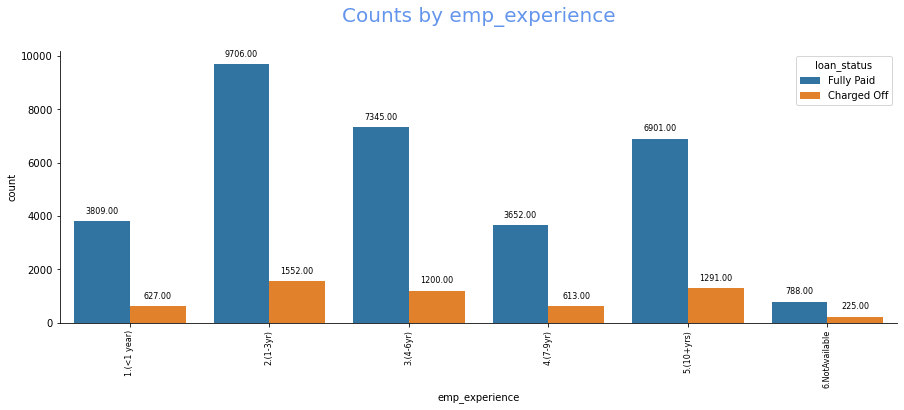

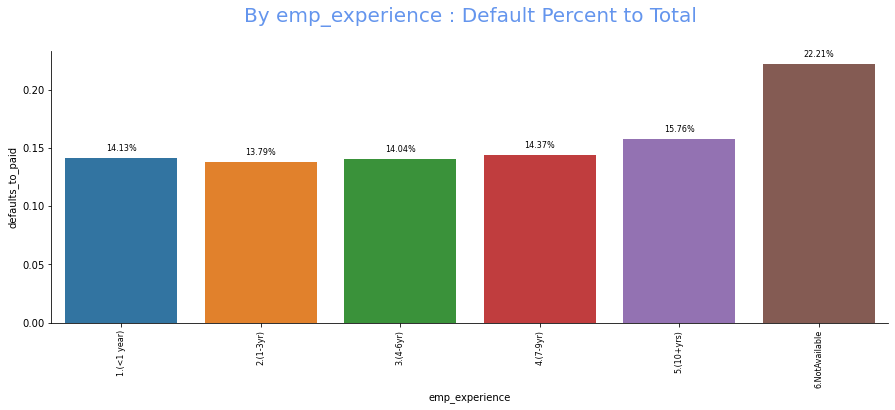

In [60]:
#
# Univariate analysis for emp_experience
#
univ_bin_attr_plot('emp_experience')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Employees between 1-6 years have sought most loans, higher defaults observed where this attribute wasn't captured</h3>

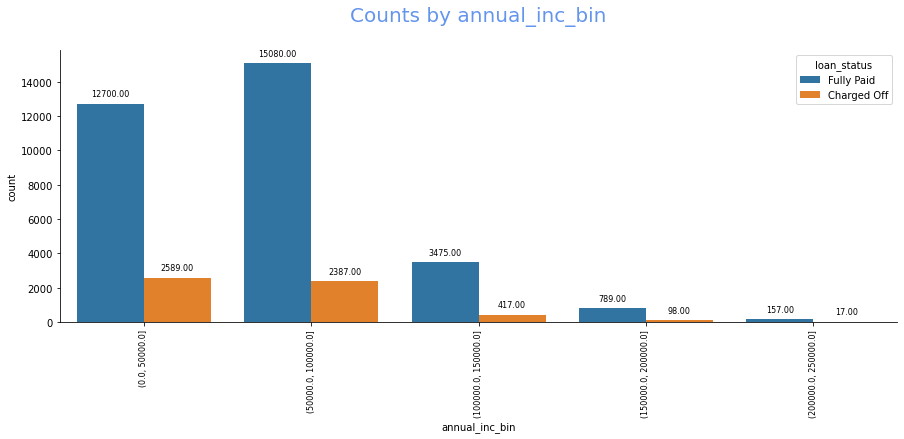

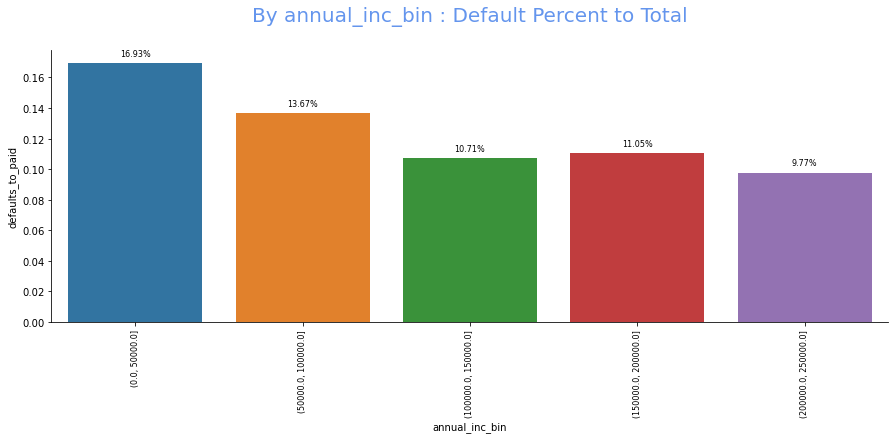

In [61]:
#
# Univariate analysis for annual_inc_bin
#
univ_bin_attr_plot('annual_inc_bin')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Maximum loans are availed by low income groups and they exhibit higher percent of defaults</h3>

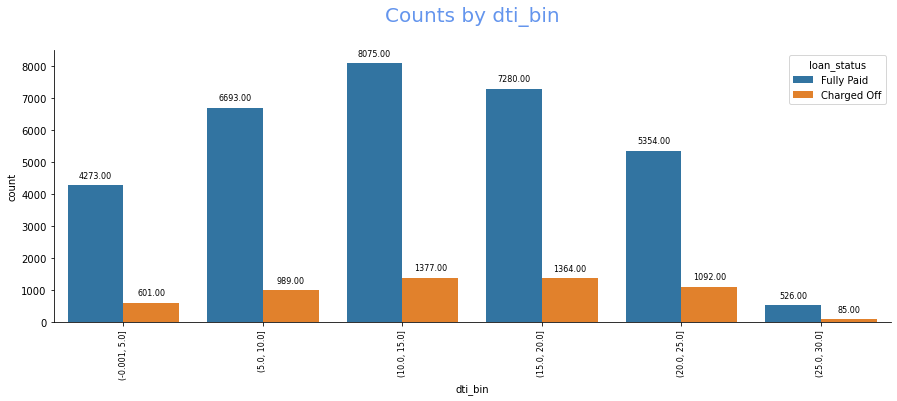

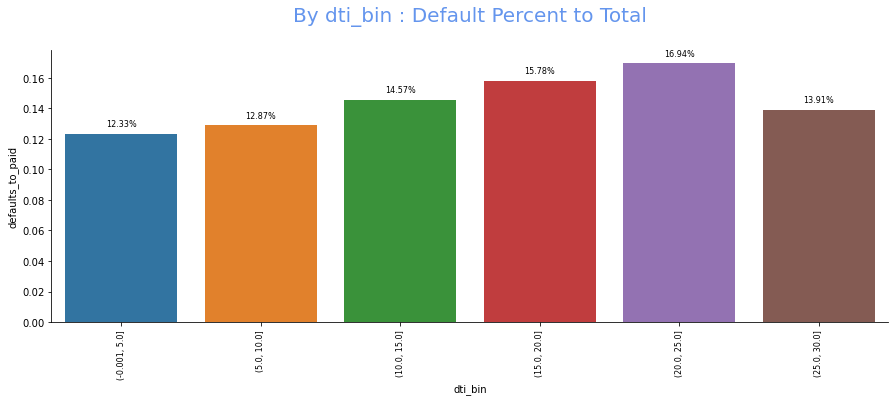

In [62]:
#
# Univariate analysis for dti_bin
#
univ_bin_attr_plot('dti_bin')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Gradual increase in default percent is observed as the Debt to Income ratio increases</h3>

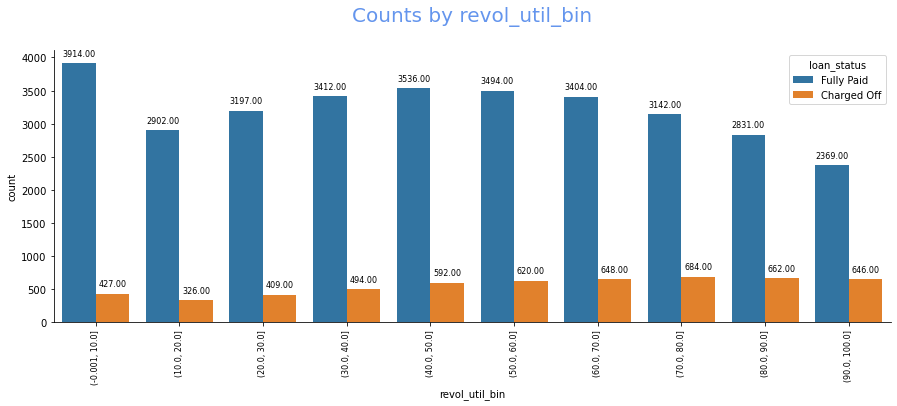

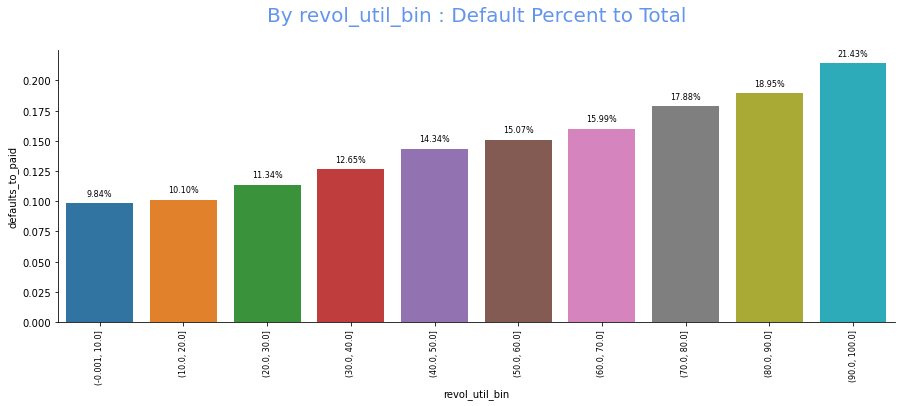

In [63]:
#
# It is assumed that revol_util will be available during loan application as it pertains to 
# total balances across all accounts by total credit limit
#
# Univariate analysis for revol_util_bin
#
univ_bin_attr_plot('revol_util_bin')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Gradual increase in default percent is observed as the revolving utilization increases</h3>

#### ------------------------------------
# Bivariate Analysis
#### ------------------------------------

#### 
### Define a function to plot pointplot, boxplot to better visualize relation between two attributes

In [64]:
#
# Bi categorical plot function
# ----------------------
# x : attribute for x axis
# y : attribute for y axis
# df : data frame input
# order : if x axis needs to be sorted
# estimator : default median for pointplot
# title: Figure title
# ----------------------
#
def bi_cat_plot_func(x,y,df,order=None,estimator=np.median,title=None):
    myplt = sns.pointplot( x=x,y=y,data=df[df.loan_status=='Charged Off'],order=order,estimator=estimator)
    myplt.set_xticklabels(myplt.get_xticklabels(),rotation=90,fontsize=8)
    sns.despine(bottom = False, left = False)
    plt.title('Defaulters '+title)
    plt.show()
    plt.clf()
    plt.close()    
    #
    myplt= sns.boxplot(x=x,y=y,data=df,hue='loan_status',order=order)
    myplt.set_xticklabels(myplt.get_xticklabels(),rotation=90,fontsize=8)
    myplt.legend(bbox_to_anchor=(1.2,0),prop={'size':6})
    sns.despine(bottom = False, left = False)
    plt.title(title+' by loan status')
    plt.show()
    plt.clf()
    plt.close()

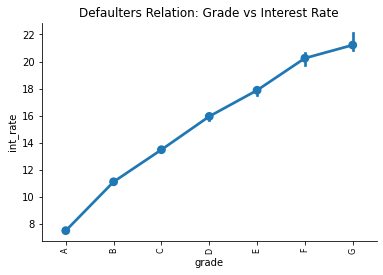

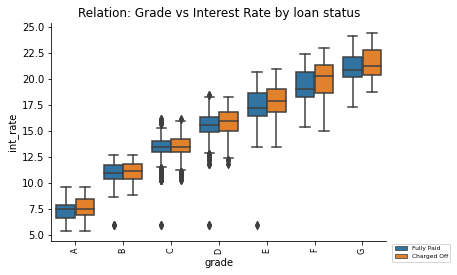

In [65]:
title="Relation: Grade vs Interest Rate"
bi_cat_plot_func('grade','int_rate',loan_df,order=sorted(loan_df.grade.value_counts().index),title=title)

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Interest Rate increases with Grade;Median for default increases with Grade and default rate</h3>

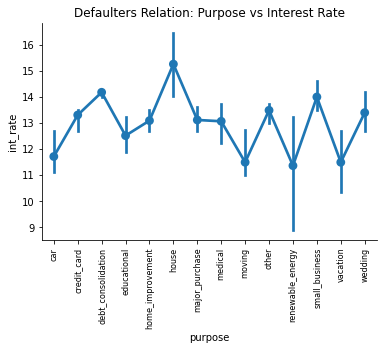

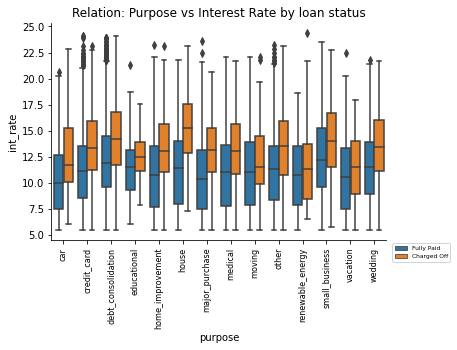

In [66]:
title="Relation: Purpose vs Interest Rate"
bi_cat_plot_func('purpose','int_rate',loan_df,order=sorted(loan_df.purpose.value_counts().index),title=title)

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Highest interest rate and default is observed for house, debt consolidation and small business</h3>

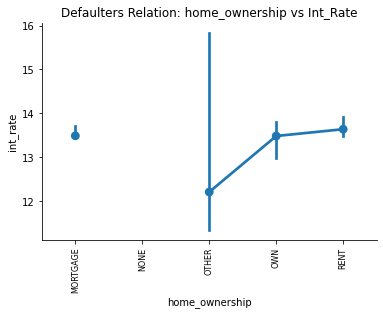

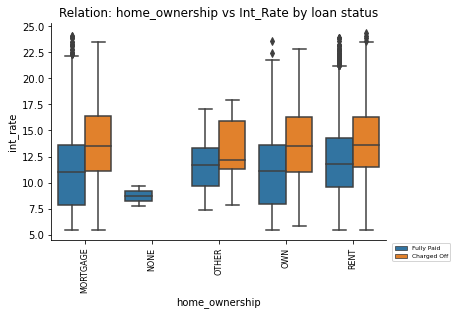

In [67]:
title="Relation: home_ownership vs Int_Rate"
bi_cat_plot_func('home_ownership','int_rate',loan_df,order=sorted(loan_df.home_ownership.value_counts().index),title=title)

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Various Home Ownerships seem to show similar relation to interest rate and defaults</h3>

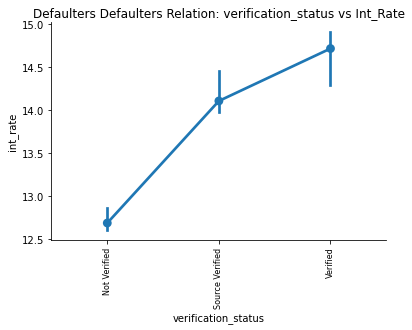

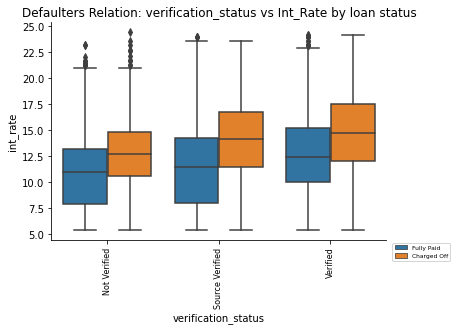

In [68]:
title="Defaulters Relation: verification_status vs Int_Rate"
bi_cat_plot_func('verification_status','int_rate',loan_df,order=sorted(loan_df.verification_status.value_counts().index),title=title)

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: While income verified loans have high interest, defaulting pattern seems to be similar</h3>

## Plot a paiplot to observe various distributions and then deep dive into specific observations

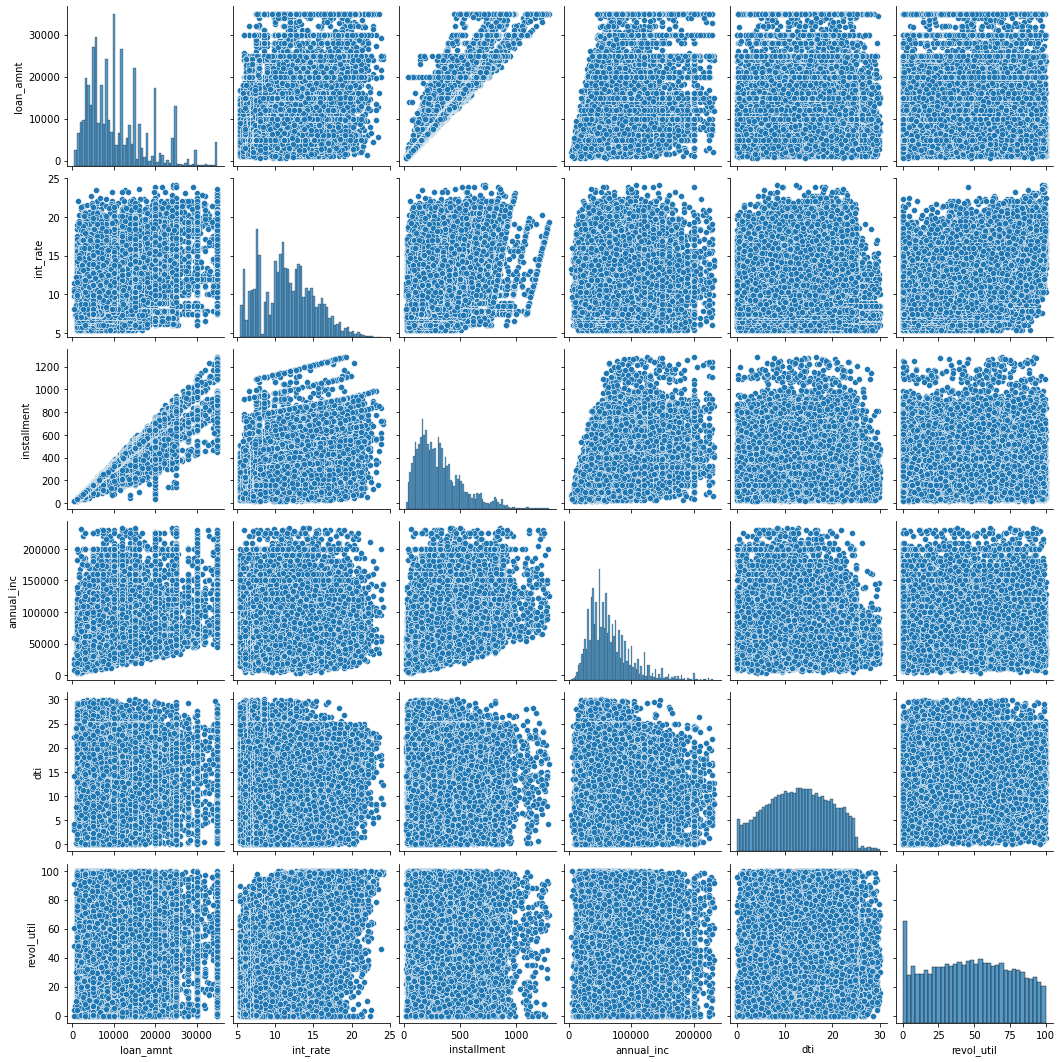

In [69]:
#
# Pair plot to visualize distribution of paid loans
#
sns.pairplot(paid_df[['loan_amnt','int_rate','installment','annual_inc','dti','revol_util']])

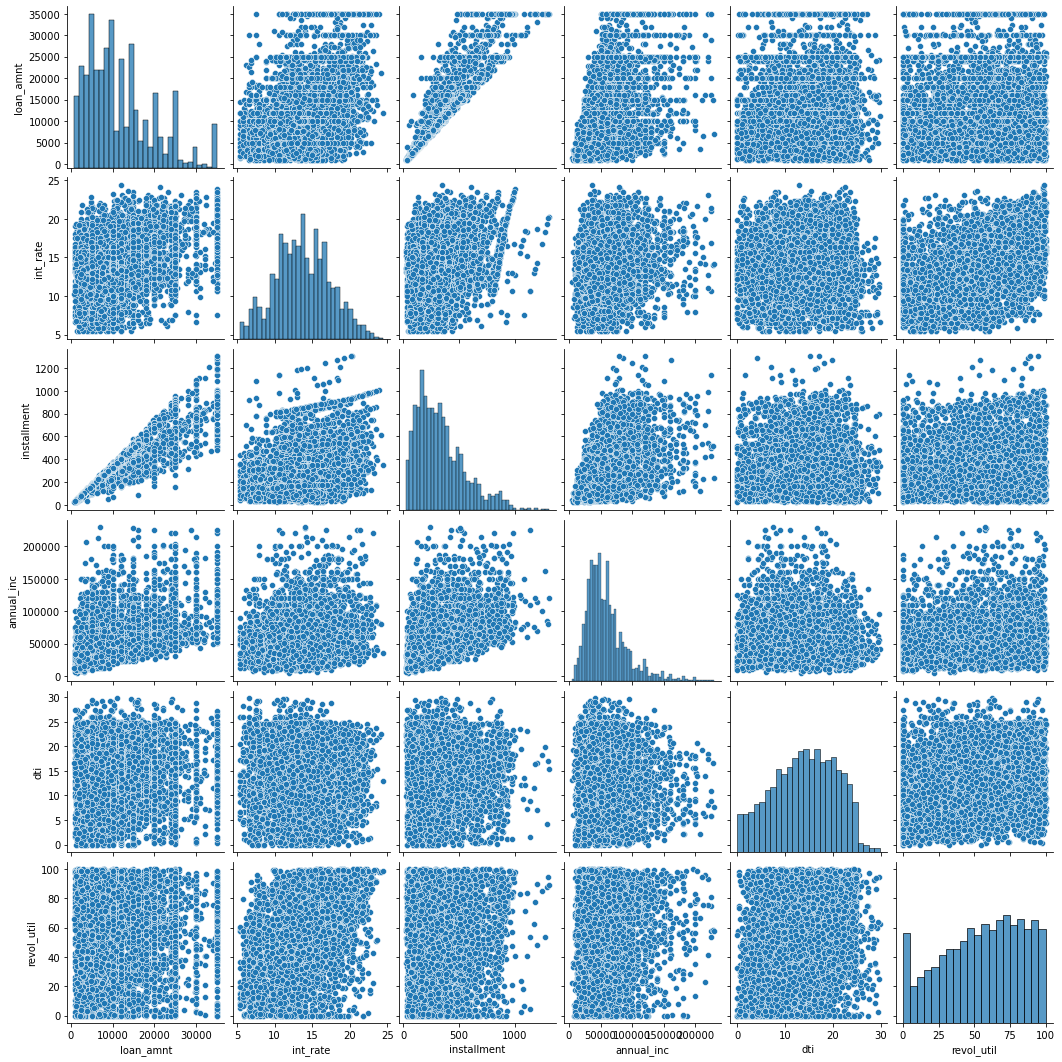

In [70]:
#
# Pair plot to visualize distribution of Defaulted loans
#
sns.pairplot(default_df[['loan_amnt','int_rate','installment','annual_inc','dti','revol_util']])

#### 
### Define a function to plot scatterplot to better visualize relation between two attributes

In [71]:
#
# Bi relation plot function
# ----------------------
# x : attribute for x axis
# y : attribute for y axis
# df : data frame input
# estimator : default median
# title: Figure title
# ----------------------
#
def bi_lm_plot_func(x,y,df,estimator=np.median,title=None,hue=None):
    hue_order= sorted(df[hue].value_counts().index)
    myplt = sns.lmplot(data=df[df.loan_status=='Fully Paid'],hue=hue,hue_order=hue_order,x=x,y=y)
    sns.despine(bottom = False, left = False)
    plt.title('Paid '+title)
    plt.show()
    plt.clf()
    plt.close()
    myplt = sns.lmplot(data=df[df.loan_status=='Charged Off'],hue=hue,hue_order=hue_order,x=x,y=y)
    sns.despine(bottom = False, left = False)
    plt.title('Defaulters '+title)
    plt.show()
    plt.clf()
    plt.close()

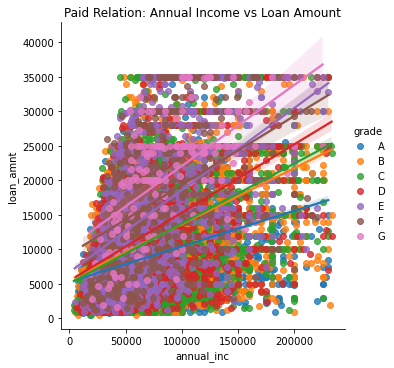

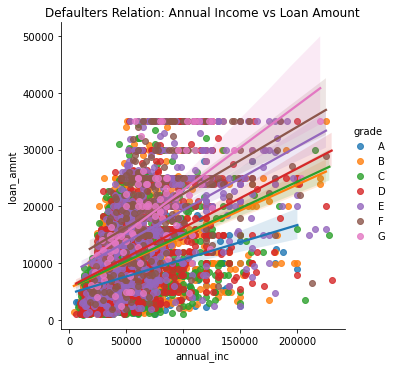

In [72]:
title="Relation: Annual Income vs Loan Amount"
bi_lm_plot_func('annual_inc','loan_amnt',loan_df,title=title,hue='grade')

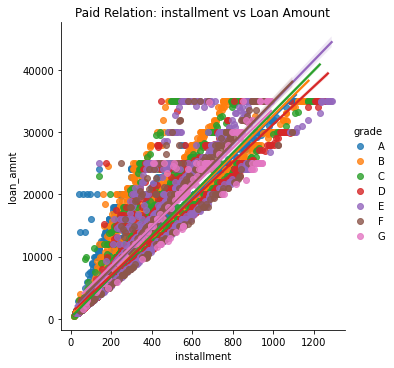

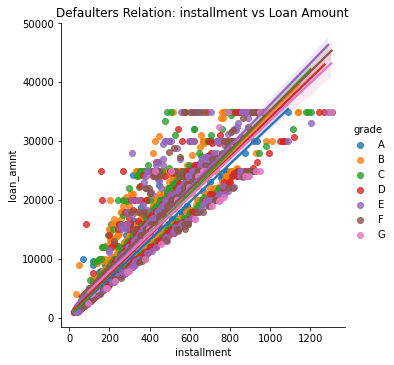

In [73]:
title="Relation: installment vs Loan Amount"
bi_lm_plot_func('installment','loan_amnt',loan_df,title=title,hue='grade')

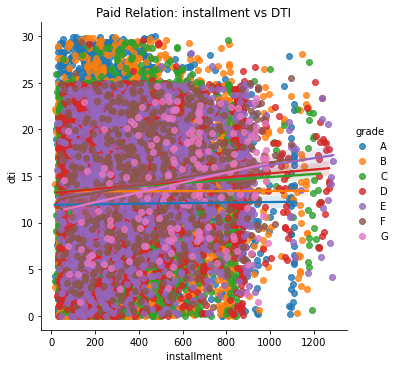

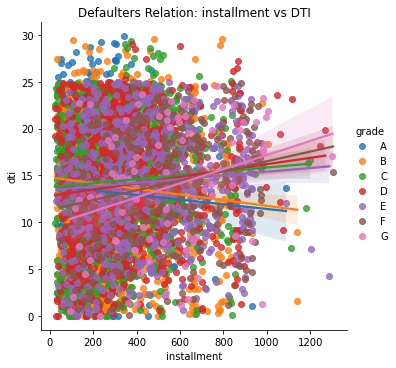

In [74]:
title="Relation: installment vs DTI"
bi_lm_plot_func('installment','dti',loan_df,title=title,hue='grade')

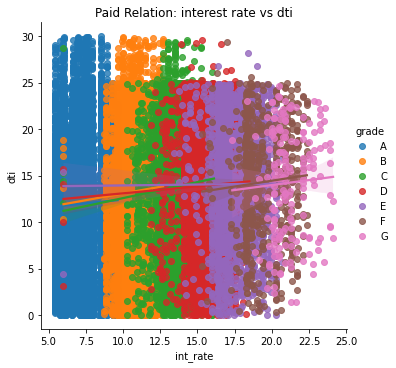

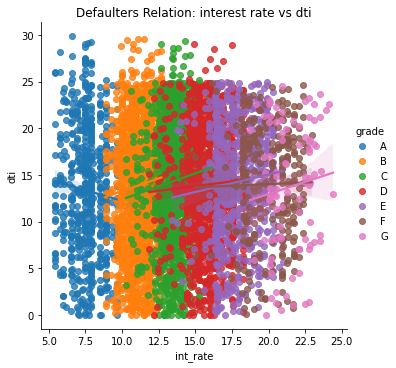

In [75]:
title="Relation: interest rate vs dti"
bi_lm_plot_func('int_rate','dti',loan_df,title=title,hue='grade')

### Observe how attributes behave for different interest rate bin

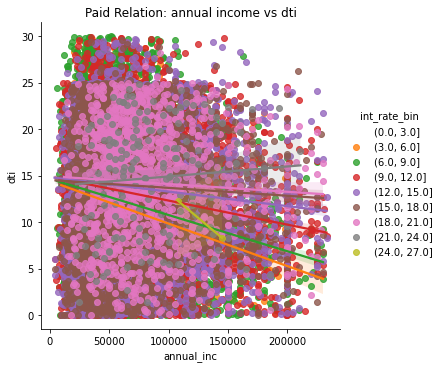

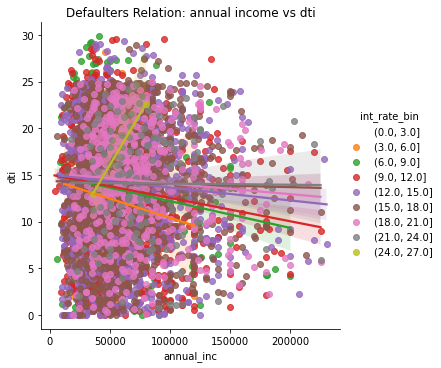

In [76]:
title="Relation: annual income vs dti"
bi_lm_plot_func('annual_inc','dti',loan_df,title=title,hue='int_rate_bin')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Customers with high dti,low income exhibit high risk of defaulting higher interest rate loans</h3>

## Observe attribute behavior for purpose

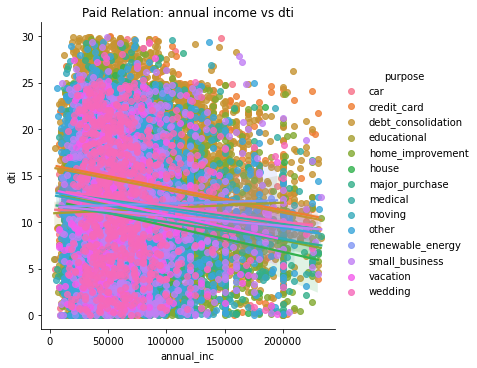

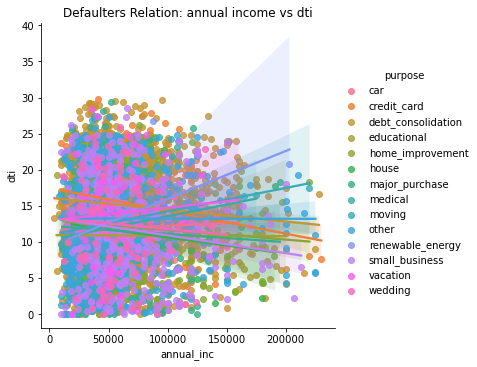

In [77]:
title="Relation: annual income vs dti"
bi_lm_plot_func('annual_inc','dti',loan_df,title=title,hue='purpose')

### Observe attribute behavior for emp_experience

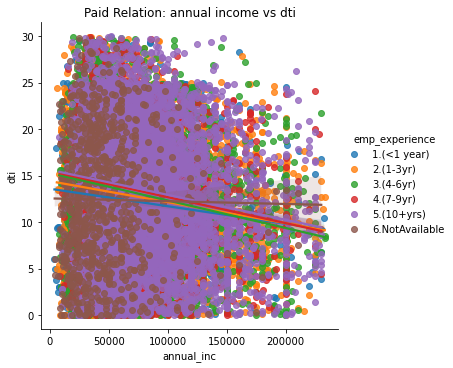

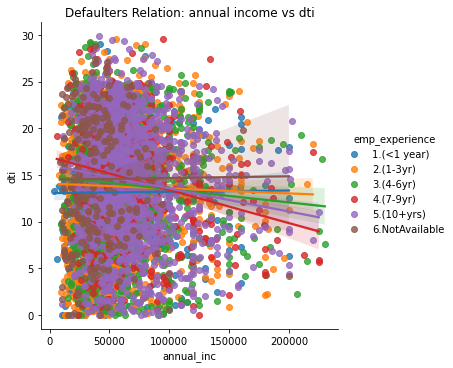

In [78]:
title="Relation: annual income vs dti"
bi_lm_plot_func('annual_inc','dti',loan_df,title=title,hue='emp_experience')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Employees with higher annual income , experience and lower dti show a reducing default rate</h3>

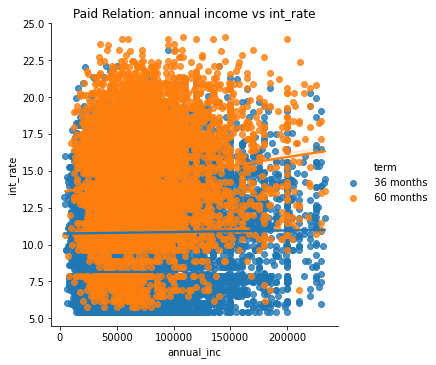

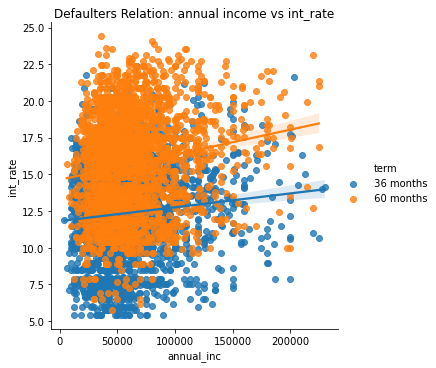

In [79]:
title="Relation: annual income vs int_rate"
bi_lm_plot_func('annual_inc','int_rate',loan_df,title=title,hue='term')

## Plot a heat map across various attributes

<AxesSubplot:>

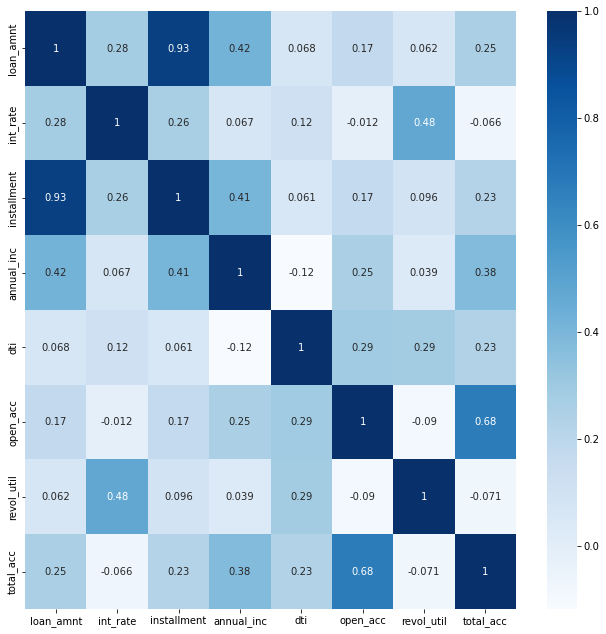

In [80]:
fig,ax=plt.subplots(figsize=(11,11))
sns.heatmap(loan_df[loan_df.loan_status=='Fully Paid'].corr(),annot=True,cmap='Blues')

<AxesSubplot:>

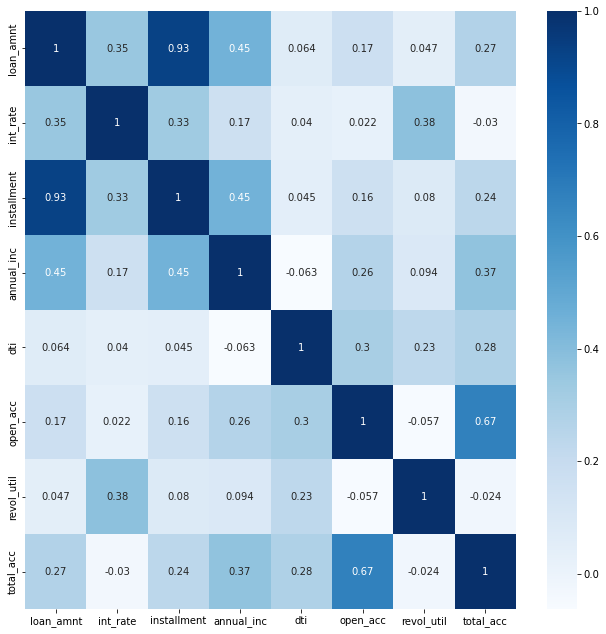

In [81]:
fig,ax=plt.subplots(figsize=(11,11))
sns.heatmap(loan_df[loan_df.loan_status=='Charged Off'].corr(),annot=True,cmap='Blues')

<h3 style="color:green"><a style="background-color:yellow;">Observation</a>: Similar heat map is observed for paid loans and default loans</h3>